In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


In [2]:
import warnings

warnings.filterwarnings("ignore")


## 1- for predicting daily AQI Buckets

In [3]:
city_day=pd.read_csv('/kaggle/input/air-quality-data-in-india/city_day.csv')
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
station_day=pd.read_csv('/kaggle/input/air-quality-data-in-india/station_day.csv')
station_day.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [5]:
stations=pd.read_csv('/kaggle/input/air-quality-data-in-india/stations.csv')
stations.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [6]:
city_day.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
stations.isna().sum() , stations.shape

(StationId       0
 StationName     0
 City            0
 State           0
 Status         97
 dtype: int64,
 (230, 5))

In [8]:
city_day.shape , station_day.shape

((29531, 16), (108035, 16))

In [9]:
stations=stations[stations['Status'] !='Inactive']
stations.shape

(228, 5)

In [10]:
stations.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [11]:
stations.fillna('Active',inplace=True)

In [12]:
station_day.isna().sum()

StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

In [13]:
station_merged=station_day.merge(stations,on='StationId',how='left')
station_merged.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [14]:
station_merged.isna().sum()

StationId          0
Date               0
PM2.5          21625
PM10           42706
NO             17106
NO2            16547
NOx            15500
NH3            48105
CO             12998
SO2            25204
O3             25568
Benzene        31455
Toluene        38702
Xylene         85137
AQI            21010
AQI_Bucket     21010
StationName     1609
City            1609
State           1609
Status          1609
dtype: int64

## 1.1 handling missing values

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay


In [16]:
station_merged.dropna(subset='AQI_Bucket',inplace=True)
station_merged.isna().sum()

StationId          0
Date               0
PM2.5           3488
PM10           23961
NO              2229
NO2             1566
NOx             4555
NH3            29832
CO              2896
SO2             9533
O3              9598
Benzene        19787
Toluene        26324
Xylene         67584
AQI                0
AQI_Bucket         0
StationName     1265
City            1265
State           1265
Status          1265
dtype: int64

In [17]:
station_merged.shape

(87025, 20)

In [18]:
station_merged.dropna(subset=['City','State','Status','StationName'],inplace=True)

station_merged.drop(['Xylene','Toluene','Benzene','NO','NOx'],axis=1,inplace=True)

In [19]:
station_merged.head()

,StationId,Date,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
1,AP001,2017-11-25,81.40,124.50,20.50,10.72,0.12,15.24,127.09,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,26.00,10.28,0.14,26.96,117.44,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,30.85,12.91,0.11,33.59,111.81,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,28.07,11.42,0.09,19.00,138.18,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,AP001,2017-11-29,72.47,114.84,23.20,12.25,0.16,10.55,109.74,173.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [20]:
station_merged.drop('StationId',axis=1,inplace=True)

In [21]:
station_merged.isna().sum()

Date               0
PM2.5           3428
PM10           23341
NO2             1519
NH3            28567
CO              2889
SO2             8831
O3              9589
AQI                0
AQI_Bucket         0
StationName        0
City               0
State              0
Status             0
dtype: int64

In [22]:
encoders={}
le=LabelEncoder()
station_merged['AQI_Bucket']=le.fit_transform(station_merged['AQI_Bucket'])
encoders['AQI_Bucket']=le

station_merged['AQI'].corr(station_merged['AQI_Bucket'])


0.554299762482664

In [23]:
station_merged['AQI']

1         184.0
2         197.0
3         198.0
4         188.0
5         173.0
          ...  
108030     50.0
108031     65.0
108032     63.0
108033     57.0
108034     59.0
Name: AQI, Length: 85760, dtype: float64

## 1.2 fitting the model

In [24]:
x=station_merged['AQI'].values.reshape(-1,1)
y=station_merged['AQI_Bucket'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=KNeighborsClassifier()

model.fit(x_train,y_train)



KNeighborsClassifier()

In [25]:
model.score(x_test,y_test)

1.0

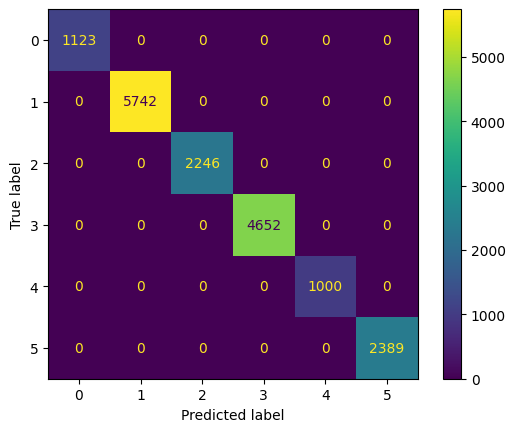

In [26]:
cm=confusion_matrix(y_test,model.predict(x_test))
plot=ConfusionMatrixDisplay(cm)
plot.plot()
plt.show()

## 2- for predicting hourly AQI Buckets

In [27]:
city_hour=pd.read_csv('/kaggle/input/air-quality-data-in-india/city_hour.csv')
city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [28]:
station_hour=pd.read_csv('/kaggle/input/air-quality-data-in-india/station_hour.csv')
station_hour.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [29]:
station_merged_hour=station_hour.merge(stations,on='StationId',how='left')
station_merged_hour

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.10,11.85,126.40,0.10,6.10,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.10,13.17,117.12,0.10,6.25,0.15,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.10,12.08,98.98,0.20,5.98,0.18,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.10,10.47,112.20,0.20,6.72,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.10,9.12,106.35,0.20,5.75,0.08,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,2.56,11.57,NaN,59.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,3.49,12.29,NaN,59.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,1.83,8.88,NaN,59.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,29.61,0.65,3.44,12.74,1.40,8.43,NaN,59.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active


In [30]:
station_merged_hour.dropna(subset='AQI',inplace=True)

In [31]:
station_merged_hour.isna().sum()

StationId            0
Datetime             0
PM2.5           138787
PM10            597086
NO              124498
NO2              99059
NOx             157440
NH3             734261
CO              170834
SO2             294848
O3              274286
Benzene         510708
Toluene         670687
Xylene         1585481
AQI                  0
AQI_Bucket           0
StationName      29134
City             29134
State            29134
Status           29134
dtype: int64

## 2.1 evaluate the model depend on AQI index

In [32]:
le=encoders['AQI_Bucket']
station_merged_hour['AQI_Bucket']=le.transform(station_merged_hour['AQI_Bucket'])

x=station_merged_hour['AQI'].values.reshape(-1,1)
y=station_merged_hour['AQI_Bucket'].values

y_pred=model.predict(x)

classification_report(y,y_pred)


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    152113\n           1       1.00      1.00      1.00    675008\n           2       1.00      1.00      1.00    239990\n           3       1.00      1.00      1.00    530164\n           4       1.00      1.00      1.00    120468\n           5       1.00      1.00      1.00    301150\n\n    accuracy                           1.00   2018893\n   macro avg       1.00      1.00      1.00   2018893\nweighted avg       1.00      1.00      1.00   2018893\n'

In [33]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152113
           1       1.00      1.00      1.00    675008
           2       1.00      1.00      1.00    239990
           3       1.00      1.00      1.00    530164
           4       1.00      1.00      1.00    120468
           5       1.00      1.00      1.00    301150

    accuracy                           1.00   2018893
   macro avg       1.00      1.00      1.00   2018893
weighted avg       1.00      1.00      1.00   2018893



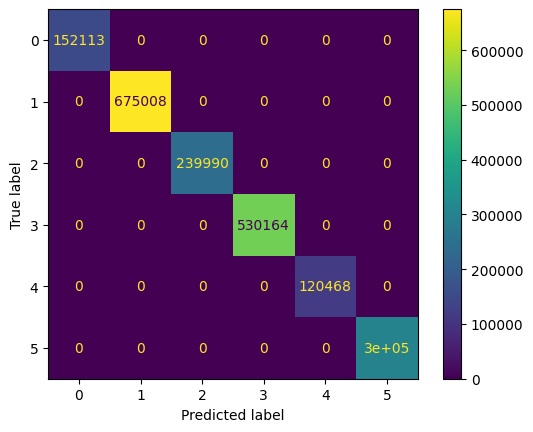

In [34]:
cm=confusion_matrix(y,y_pred)
plot=ConfusionMatrixDisplay(cm)
plot.plot()
plt.show()

## note: AQI Bucket depend on AQI Only